In [1]:
# Configure the integration and enable interactive mode
# Se ho una lorentziana, sto descrivendo un tempo di vita definito e la larghezza della lor è il tempo di vita media
%matplotlib widget
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from FunFit import *

# qubit_spec_20230801

In [3]:

# dir_path = "C:\\Users\\fsfinardi\\Documents\\01_Personali\\Università-2324\\LabCrio\\data\\qubit_spectroscopy"
dir_path = "C:\\Users\\oper\\SynologyDrive\\Lab2023\\Qubit\\data\\qubit_spectroscopy"

dirs = os.listdir(dir_path)
for name in dirs:
    print(f'Directory {dirs.index(name)}: {name}')

file = np.load(f"{dir_path}\\{dirs[1]}\\data\\qubit spectroscopy_0\\data.npz")
print(file.files)

Directory 0: qubit_spec_20230801
Directory 1: qubit_spec_20230803
Directory 2: qubit_spec_20230809
['D1', 'D2', 'D3']


In [4]:
D1 = file['D1']
D2 = file['D2']
D3 = file['D3']

print(D1.dtype)
D1_freq = D1['freq']
D1_msr = D1['msr']
D1_phase = D1['phase']

[('freq', '<f8'), ('msr', '<f8'), ('phase', '<f8')]


## Qubit_D1 - Frequency vs MSR and Frequency vs Phase

Qui misuro risonatore accoppiato a uno dei due stati, in funzione della freq inviata  al Qubit. Ricordarsi SHIFT DEL RISONATORE

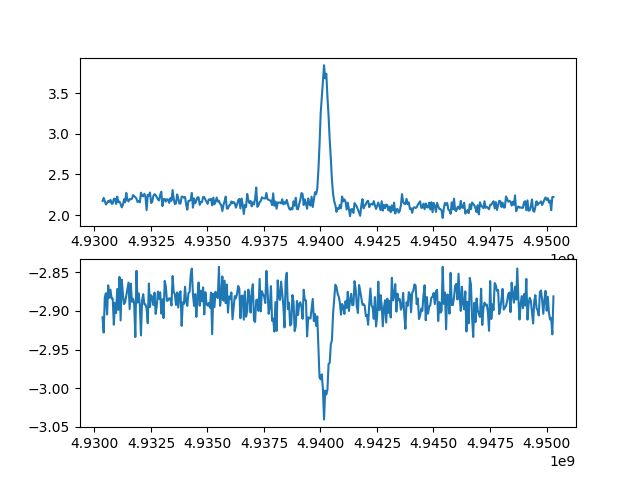

In [5]:
plt.figure()
plt.subplot(211)
plt.plot(D1_freq, D1_msr)
plt.subplot(212)
plt.plot(D1_freq, D1_phase)

## Moving Avarage

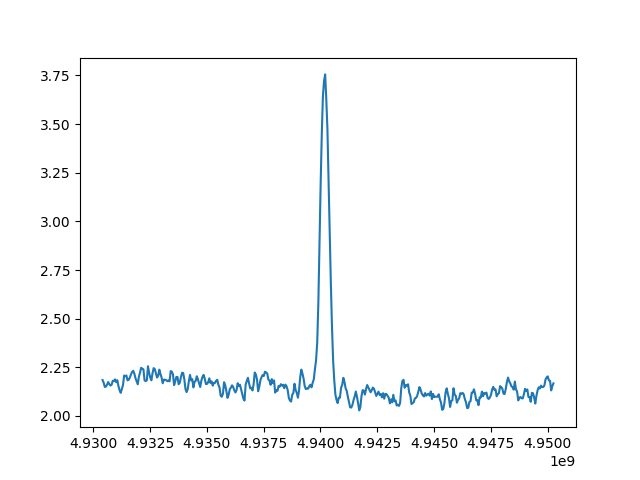

In [6]:
window_size = 3
x, y = moving_avg(D1_freq, D1_msr, window_size).values()

plt.figure()
plt.plot(x, y)

## Setting the initial values for the fit

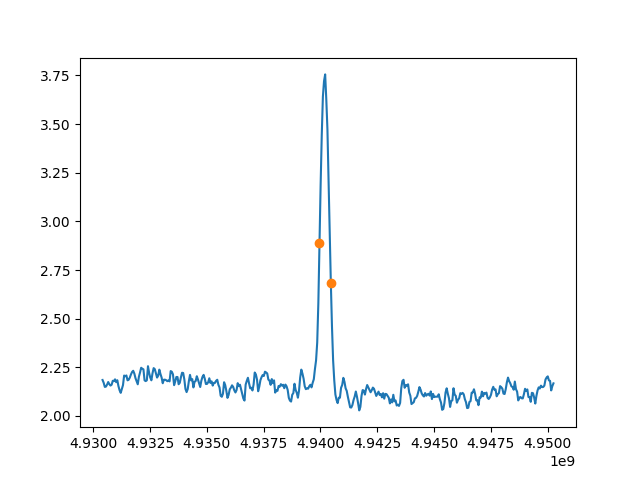

Minimum: 2.0287250644263874
Maximum: 3.7548723436043248
f peak: 4940207493.0
Gamma: 0.0005


In [7]:
D1_min = min(y)
D1_max = max(y)
idx_max = y.index(max(y))
D1_peak = x[idx_max]

half_height = (D1_max + D1_min)/2

argMax = np.argmax(y)
idx_L = np.argmin(np.abs(half_height - np.array(y[:argMax])))
idx_R = np.argmin(np.abs(half_height - np.array(y[argMax:]))) + (idx_max + 1)

fig = plt.figure()
plt.plot(x, y)
plt.plot([x[idx_L],x[idx_R]], [y[idx_L],y[idx_R]], ls = 'none', marker = 'o')

D1_gamma = x[idx_R] - x[idx_L]
plt.show()

print('Minimum:', D1_min)
print('Maximum:', D1_max)
print('f peak:', D1_peak)
print('Gamma:', D1_gamma/1e9)


## Fit with "best" parameters found

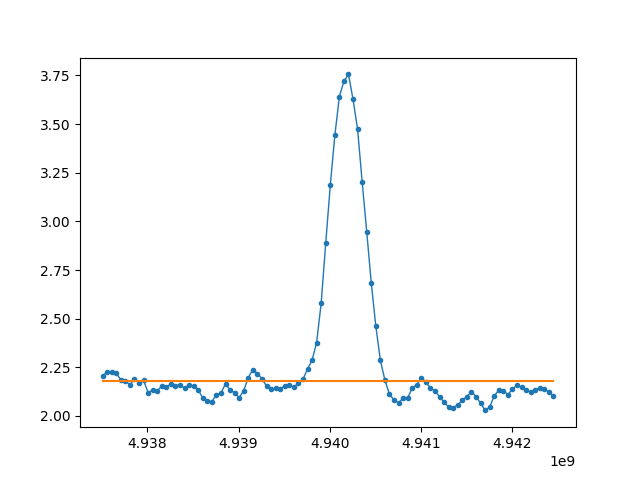

In [9]:
x_c, y_c = data_cut(x, y, 4.9375e9, 4.9425e9).values()

# Amplitude, x0, Gamma, Minimum
pars = [D1_max, D1_peak, D1_gamma, D1_min]

pars_opt, err_cov = curve_fit(Lorentzian, x, y, pars)
plt.figure()
plt.plot(x_c, y_c, marker = '.', linewidth = 1)   
plt.plot(x_c, Lorentzian(x_c, *pars_opt))
